In [1]:
using CairoMakie
using Random
using Statistics: mean
using Printf

### Exercise: plot positions and $l_\nu^*$ for the case of isotropic scattering, after $N$ random scattering events in 2D

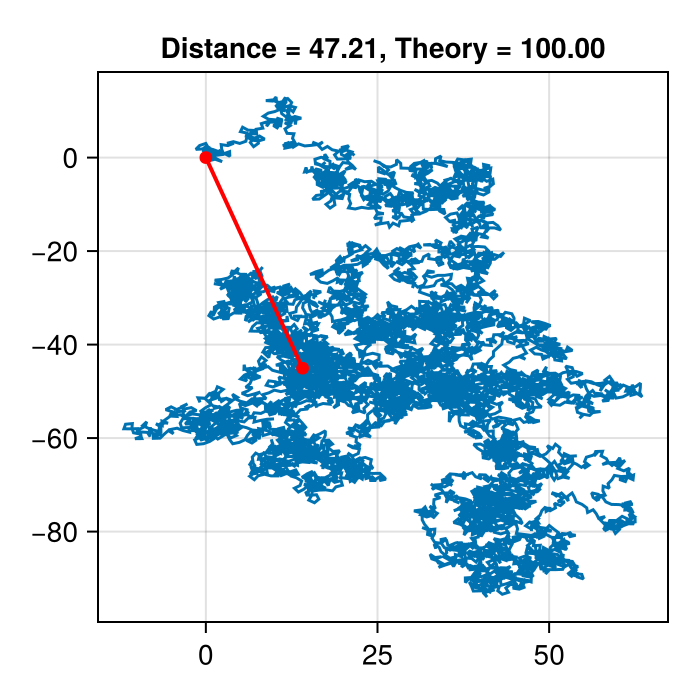

In [2]:
N = 10_000
l = 1
x = zeros(Float64, N)
y = zeros(Float64, N)

for i in 2:N
    θ = rand() * 2π
    x[i] = x[i-1] + l * cos(θ)
    y[i] = y[i-1] + l * sin(θ)
end

distance = sqrt(x[end]^2 + y[end]^2)
theory = sqrt(N) * l

fig = Figure(size=(350,350))
tle = @sprintf "Distance = %.2f, Theory = %.2f" distance theory
ax = Axis(fig[1,1], title=tle)
lines!(ax, x, y)
scatterlines!(ax, [x[1], x[end]], [y[1], y[end]], color=:red, linewidth=2)
fig

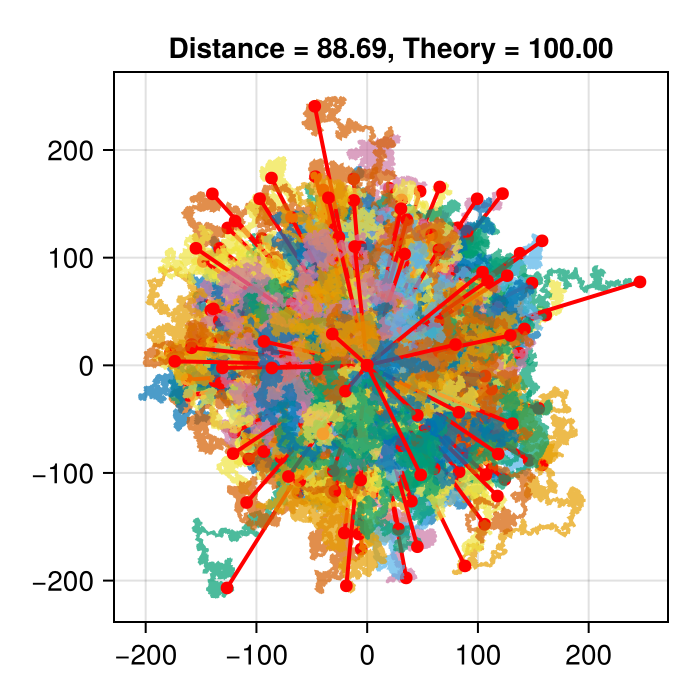

In [4]:
N = 10_000
l = 1
repeats = 500
distance = zeros(repeats)

fig = Figure(size=(350,350))
ax = Axis(fig[1,1])

for j in 1:repeats
    x = zeros(Float64, N)
    y = zeros(Float64, N)
    for i in 2:N
        θ = rand() * 2π
        x[i] = x[i-1] + l * cos(θ)
        y[i] = y[i-1] + l * sin(θ)
    end
    distance[j] = sqrt(x[end]^2 + y[end]^2)
    lines!(ax, x, y; alpha=0.7, rasterize=true)
    scatterlines!(ax, [x[1], x[end]], [y[1], y[end]], 
                  color=:red, linewidth=2)
end

actual = mean(distance)
theory = sqrt(N) * l
ax.title = @sprintf "Distance = %.2f, Theory = %.2f" actual theory
fig